In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
file_path = "realtor-data.csv"
df = pd.read_csv(file_path)

In [29]:
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.00000,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.00000,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.00000,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.00000,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,2147.35364,NaN,65000.0


In [31]:
#Choose random 1000 rows for testing purposes
df = df.sample(n=1000, random_state=42)

In [32]:
df.dtypes

status             object
bed                object
bath               object
acre_lot          float64
city               object
state              object
zip_code          float64
house_size        float64
prev_sold_date     object
price             float64
dtype: object

In [33]:
#Check for the null values in each column
null_values = df.isnull().sum()
null_values

status              0
bed                 0
bath                0
acre_lot            0
city                0
state               0
zip_code            0
house_size          0
prev_sold_date    470
price               0
dtype: int64

In [35]:
#Replace null values

#Replacing missing values for the number of bedrooms with the mode
df['bed'].replace(np.nan, df['bed'].mode, inplace = True)
#Replacing missing values for the number of bathrooms with the mode
df['bath'].replace(np.nan, df['bath'].mode, inplace = True)
#Replacing missing values for the acre_lot with the mean
df['acre_lot'].replace(np.nan, df['acre_lot'].mean(), inplace = True)
#Remove rows with missing City names
df.dropna(subset=['city'], inplace=True)
#Remove rows with missing State
df.dropna(subset=['state'], inplace=True)
#Replace missing values of the house_size with the mean
df['house_size'].replace(np.nan, df['house_size'].mean(), inplace = True)
#Remove rows with missing price values
df.dropna(subset=['price'], inplace=True)
#Prev sold date and Zip code is not important

/tmp/ipykernel_36227/353270225.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['acre_lot'].replace(np.nan, df['acre_lot'].mean(), inplace = True)
/tmp/ipykernel_36227/353270225.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [36]:
null_values = df.isnull().sum()
null_values

status              0
bed                 0
bath                0
acre_lot            0
city                0
state               0
zip_code            0
house_size          0
prev_sold_date    470
price               0
dtype: int64

In [37]:
df[['acre_lot','house_size', 'price']].corr()

,acre_lot,house_size,price
acre_lot,1.000000,-0.034012,0.151729
house_size,-0.034012,1.000000,0.417481
price,0.151729,0.417481,1.000000


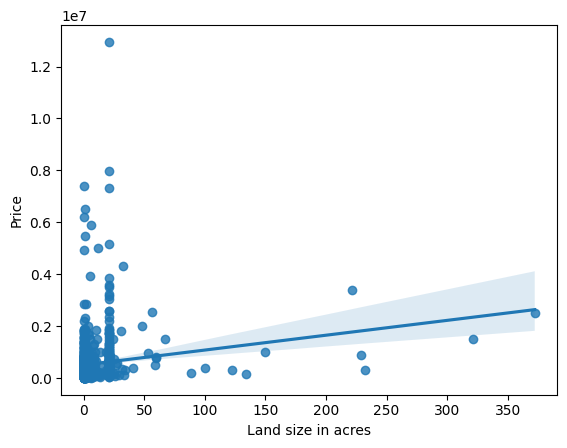

In [42]:
#Plot regression line of acre_lot against price
sns.regplot(x="acre_lot", y="price", data = df)
plt.xlabel("Land size in acres")
plt.ylabel("Price")
plt.show()

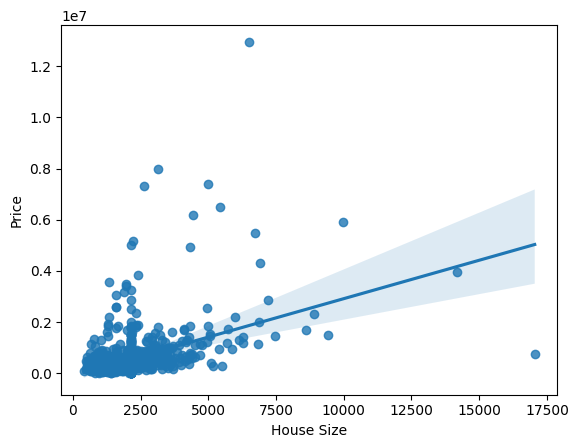

In [43]:
#Plot regression line of house size against price
sns.regplot(x="house_size", y="price", data = df)
plt.xlabel("House Size")
plt.ylabel("Price")
plt.show()

In [48]:
# Divide df to train and test
x_data = df[['acre_lot', 'house_size']]
y_data = df['price']


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 23)

In [50]:
lm = LinearRegression()
lm

LinearRegression()

In [53]:
lm.fit(x_train, y_train)
Yhat = lm.predict(x_test)

/tmp/ipykernel_36227/1030789919.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color='r', label = 'Actual Value')
/tmp/ipykernel_36227/1030789919.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Yhat, hist=False, color='b', label = 'Fitted

Text(0.5, 1.0, 'Actual vs Fitted values for price')

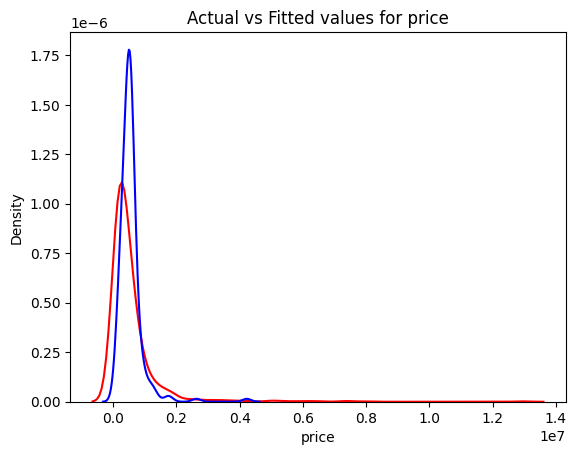

In [58]:
#plot actual vs predicted values for price

ax1 = sns.distplot(df['price'], hist=False, color='r', label = 'Actual Value')
sns.distplot(Yhat, hist=False, color='b', label = 'Fitted Values', ax=ax1)

plt.title("Actual vs Fitted values for price")